## Import required modules.

In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
import time

### Use link below to recall vectorized format of Linear Regression
### https://www.geeksforgeeks.org/vectorization-of-gradient-descent/


In [2]:
class Linear_Regression:
    def __init__(self,X,y,lr=0.1,n_iter=100):
        self.lr=lr
        self.n_iter=n_iter
        self.X=self.add_ones(X)
        self.y= y.reshape(y.shape[0], 1) # Convert y from 1d to 2d array.
#         print(f'X = {self.X}')
#         print(f'y = {self.y}')
        
    def fit(self):
        n_samples,n_features=self.X.shape
        self.n_samples=n_samples
        self.weights=np.ones(shape=(n_features,1)) # the first index pos is for 'b'(bias)
#         print(f'self.weights = {self.weights}')
        self.gd()
        
    ''' In short, the dot product is the sum of products of values in two same-sized vectors and the matrix multiplication 
    is a matrix version of the dot product with two matrices.
    '''
    def gd(self):
#         print(f'self.X = {self.X}')
#         print(f'self.y = {self.y}')
#         print(f'self.weights before gd = {self.weights}')
        for i in range(self.n_iter):
            g1=self.X.dot(self.weights)- self.y # h_theta-y
#             print(f'g1 = {g1}')
            g2=(self.X.T)@(g1)
#             print(f'g2 = {g2}')
            
            self.weights = self.weights - ((1/self.n_samples)*self.lr*g2)
            
#         print(f'self.g1 after gd = {self.weights}')
            
    def predict(self,X):
        X = self.add_ones(X)
#         print(f'X = {X}')
#         print(f'w = {self.weights}')
        
        pred = X.dot(self.weights)
        return pred
        
        
    # this function will add a column of ones to your dataset    
    def add_ones(self,X):
        ones=np.ones((len(X),1))
        X=np.concatenate([ones,X],axis=1)
        return X
    
    def mse(self,y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)
        
        

In [3]:
# testing
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X, y = datasets.make_regression(n_samples=100,noise=10, n_features=1, random_state=4)
datasets.make_classification()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [4]:
X[:10]

array([[-1.3474603 ],
       [ 0.3523434 ],
       [ 0.9546986 ],
       [ 0.03592805],
       [ 0.04800625],
       [ 0.04860301],
       [ 0.72334161],
       [ 0.80208661],
       [-1.14379857],
       [ 0.17941071]])

In [5]:
y[:10]

array([-114.29640622,   38.84514523,   67.83340531,    4.39178084,
         -1.04166201,    0.4698121 ,   56.82174519,   57.36723819,
        -91.10796879,   19.13744912])

In [6]:
X.shape

(100, 1)

In [7]:
y.shape

(100,)

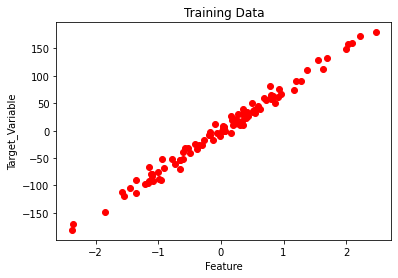

In [8]:
# Visualize the relation b/w X and y only when x containts a single feature
if(X.shape[1]==1):
    plt.scatter(X, y, c = 'red')
    plt.xlabel('Feature')
    plt.ylabel('Target_Variable')
    plt.title('Training Data')
    plt.show()

In [9]:
# plt.scatter(X_train,y_train)
X_train[:5],y_train[:5]

(array([[0.17941071],
        [0.15846954],
        [0.52324766],
        [1.3799201 ],
        [0.33225315]]),
 array([ 19.13744912,  -3.51845806,  38.5505602 , 111.40279483,
         17.39771228]))

In [10]:
lr=Linear_Regression(X_train,y_train,1,2000)
lr.fit()

In [11]:
y_pred = lr.predict(X)

In [12]:
from sklearn.metrics import mean_absolute_error

In [13]:
mean_absolute_error(y,y_pred)

6.886848283977797

In [14]:
lr.mse(y,y_pred)

10856.597323875822

In [15]:
len(y[80:])

20

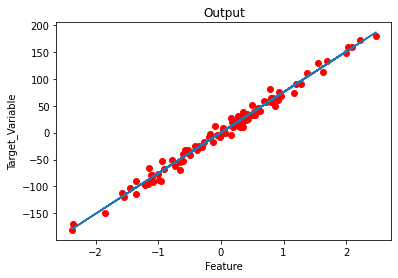

In [16]:
if(X.shape[1]==1):
    plt.scatter(X, y, c = 'red')
    plt.plot(X ,y_pred)
    plt.xlabel('Feature')
    plt.ylabel('Target_Variable')
    plt.title('Output')